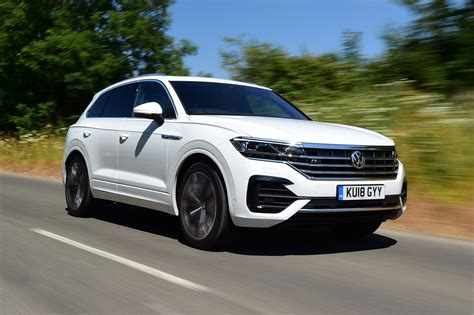

<br/><br/><div id="top"></div>

<center><a style="font-size: 16pt; font-weight: bold">
    Déterminer la sûreté de la voiture
</a></center>
<br/>
<center><a style="font-size: 12pt; font-weight: bold">
    Un problème de classification multi-classe sur des données décrivant une voiture
<br/>
<center><a style="font-size: 12pt">
    https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
</a></center>

Membres du binôme: Merimi Fatima-Zahra, Joanna Radola

### Présentation du projet
#### La question principale de ce projet est :
    Comment prédire la sûreté d'une voiture selon ses caractéristiques ?

Chaque jour, des milliers de voiture parcourent les rues. A l'aide des caractéristiques du dataset, on veut minimiser le risque d'accident dont la cause est la défaillance du véhicule.


### Données

L'ensemble de données contient des informations sur 1728 voitures, représentés par des variables catégorielles et numériques. Ces variables sont le prix, la maintenance, nombres de portes etc. Il y a 6 attributs.

La classe à prédire est une variable catégoritielle indiquant des niveaux de sûreté: unaccurate, accurate, good, very good. 

    Sources:
       (a) Creator: Marko Bohanec
       (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
       (c) Date: June, 1997
       
Remarque: le dataset choisi n'est pas optimal pour ce cours à cause du peu de features et nombres s'instances.

### Tâche

Notre tâche consiste à créer un modèle d'apprentissage à partir du dataset et de faire des prédictions (apprentissage supervisé). 

In [1]:
#!pip install numpy, matplotlib, sklearn, panda

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd


from sklearn import (
    decomposition, discriminant_analysis, ensemble, metrics, model_selection, pipeline, preprocessing,)

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### Chargement des données

In [3]:
#load data
#data = pd.read_csv('car.data', sep='\n')
data = pd.read_csv('car.data', sep=',')

#labels = pd.read_csv("car.names", header=None ).values.flatten()

x = pd.read_csv("car.data", header=None, sep=',')

In [4]:
data, x[:10][:7]

(     buying  maint  doors persons lug_boot safety class_values
 0     vhigh  vhigh      2       2    small    low        unacc
 1     vhigh  vhigh      2       2    small    med        unacc
 2     vhigh  vhigh      2       2    small   high        unacc
 3     vhigh  vhigh      2       2      med    low        unacc
 4     vhigh  vhigh      2       2      med    med        unacc
 ...     ...    ...    ...     ...      ...    ...          ...
 1723    low    low  5more    more      med    med         good
 1724    low    low  5more    more      med   high        vgood
 1725    low    low  5more    more      big    low        unacc
 1726    low    low  5more    more      big    med         good
 1727    low    low  5more    more      big   high        vgood
 
 [1728 rows x 7 columns],
         0      1      2        3         4       5             6
 0  buying  maint  doors  persons  lug_boot  safety  class_values
 1   vhigh  vhigh      2        2     small     low         unacc
 2   v

### Analyse exploratoire
#### type de variables: catégoritielles
#### Distribution de la variable cible: 
(class, N, N[%]) 
unacc     1210     (70.023 %); 
acc        384     (22.222 %); 
good        69     ( 3.993 %); 
v-good      65     ( 3.762 %) 

In [5]:
#vhigh, high, med, low. => 3,2,1,0
distribution3 = data[data['class_values'] == 3].to_numpy()
distribution2 = data[data['class_values'] == 2].to_numpy()
distribution1 = data[data['class_values'] == 1].to_numpy()
distribution0 = data[data['class_values'] == 0].to_numpy()
distribution = [distribution3, distribution2, distribution1, distribution0]

for d in distribution:
    print((d.shape[0]/data.shape[0])*100, "%")


0.0 %
0.0 %
0.0 %
0.0 %


#### exemple d'une instance

In [6]:
type(data)
data.iloc[0]
#print(data.iloc[0][0] == 'vhigh')

buying          vhigh
maint           vhigh
doors               2
persons             2
lug_boot        small
safety            low
class_values    unacc
Name: 0, dtype: object

#### noms des différentes features

In [7]:
features = data.columns
features

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'class_values'],
      dtype='object')

Cet histogramme nous décrit la relation entre le niveau de maintenance d'une voiture et son niveau de sûreté. On remarque que le niveau de maintenance doit être minimal pour une sûreté maximal. Autrement dit, une voiture n'ayant pas besoin de beaucoup d'entretien est plus sûre.

In [8]:
maintain_0 = data[data['class_values'] == 3]['maint'].to_numpy()
maintain_1 = data[data['class_values'] == 0]['buying'].to_numpy()
maintain_2 = data[data['class_values'] == 0]['class_values'].to_numpy()

In [9]:
maintain_0.shape, maintain_1.shape, maintain_2.shape

((0,), (0,), (0,))

(0,)


/opt/conda/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'maint')

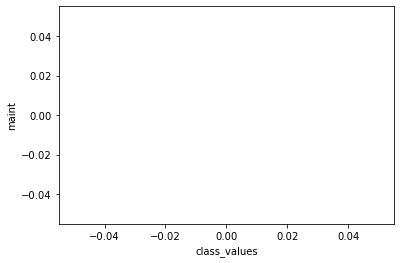

In [10]:
maintain_0 = data[data['class_values'] == 3]['maint'].to_numpy()
print(maintain_0.shape)

plt.hist(maintain_0, density = True )
plt.xlabel('class_values')
plt.ylabel('maint')

L'histogramme suivant nous assure que les features sont indépendantes entre elles, elles ne sont pas corrélées. Nous avons essayé toutes les permutations couples des features.

In [11]:
B_S = data[data['buying'] == 3]['safety'].to_numpy()
names = ['vhigh', 'high', 'med', 'low']

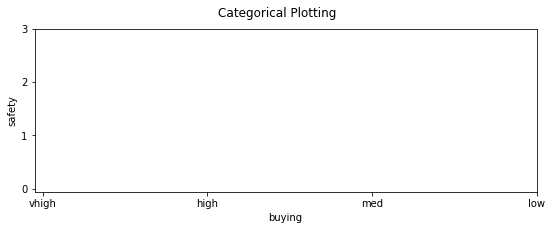

In [12]:
plt.figure(figsize=(9, 3))
plt.hist(B_S)
plt.xlabel('buying')
plt.ylabel('safety')
plt.xticks([0, 1, 2, 3], names)
plt.yticks([0, 1, 2, 3])
plt.suptitle('Categorical Plotting')
plt.show()

### Pre-traitement

Dans ce dataset, il n'y a pas de données manquantes ou non définie. Cependant, si nous avions ce problèmes on l'aurait de 2 façon: supprimer l'instance concernée ou la remplacer par la valeur la plus probable. Nous aurions pu aussi supprimer les variables à valeur constantes.

#### Transformation des données catégorielles en nombres entiers en utilisant un encodage numérique simple.
L'encodage 1-hot n'est pas nécessaire dans notre cas d'étude.

In [13]:
def convert_buying_maint(d): #vhigh, high, med, low. => 3,2,1,0
        for i in range(d.shape[0]):
            for j in range(2):
                if(d.iloc[i][j] == 'vhigh'):
                    d.iloc[i][j] = 3

                elif(d.iloc[i][j] == 'high'):
                    d.iloc[i][j] = 2

                elif(d.iloc[i][j] == 'med'):
                    d.iloc[i][j] = 1

                else:
                    d.iloc[i][j] = 0

In [14]:
def convert_lugboot_safety(d): #small, med, big. => 2,1,0
        for i in range(d.shape[0]):
            for j in range(4,6):
                if(d.iloc[i][j] == 'small' or d.iloc[i][j] == 'low'):
                    d.iloc[i][j] = 0

                elif(d.iloc[i][j] == 'med'):
                    d.iloc[i][j] = 1

                else:
                    d.iloc[i][j] = 2

In [15]:
def convert_doors_persons(d): # 5-more, more => 6
    for i in range(d.shape[0]):
        for j in range(2,4):
            if(d.iloc[i][j] == '5more' or d.iloc[i][j] == 'more'):
                d.iloc[i][j] = 6

In [16]:
def convert_classvalues(d): #unacc, acc, good, vgood => 0,1,2,3
     for i in range(d.shape[0]):
            j = 6
            if(d.iloc[i][j] == 'unacc'):
                d.iloc[i][j] = 0

            elif(d.iloc[i][j] == 'acc'):
                d.iloc[i][j] = 1

            elif(d.iloc[i][j] == 'good'):
                d.iloc[i][j] = 2

            else:
                d.iloc[i][j] = 3

In [17]:
convert_buying_maint(data)
convert_lugboot_safety(data)
convert_doors_persons(data)
convert_classvalues(data)

In [18]:
print(data)

     buying maint doors persons lug_boot safety class_values
0         3     3     2       2        0      0            0
1         3     3     2       2        0      1            0
2         3     3     2       2        0      2            0
3         3     3     2       2        1      0            0
4         3     3     2       2        1      1            0
...     ...   ...   ...     ...      ...    ...          ...
1723      0     0     6       6        1      1            2
1724      0     0     6       6        1      2            3
1725      0     0     6       6        2      0            0
1726      0     0     6       6        2      1            2
1727      0     0     6       6        2      2            3

[1728 rows x 7 columns]


#### Création de l'ensemble de validation

In [19]:
data.iloc[0:1728, 6].value_counts()
data.iloc[0:1728, 6].describe()

count     1728
unique       4
top          0
freq      1210
Name: class_values, dtype: int64

In [20]:
X = data.iloc[0:1728, 0:6].to_numpy()
Y = data.iloc[0:1728, 6].to_numpy()
Test = data.iloc[0:1728, 0].to_numpy()

Test, Y

(array([3, 3, 3, ..., 0, 0, 0], dtype=object),
 array([0, 0, 0, ..., 0, 2, 3], dtype=object))

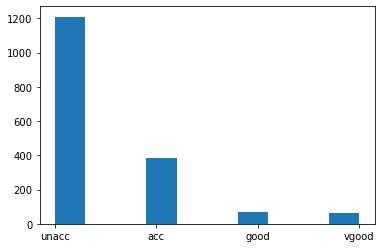

In [21]:
plt.hist(Y)
plt.xticks([0, 1, 2, 3], ['unacc', 'acc', 'good', 'vgood'])
# plt.savefig("static/histY.png", dpi=200)
plt.show()

In [22]:
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(X, Y, test_size=0.3)
print("taille de x_valid: ", np.ceil(0.3*data.shape[0]), ", ", x_valid.shape)

taille de x_valid:  519.0 ,  (519, 6)


#### Réduction de dimension avec la PCA 
Avant d'appliquer la PCA, nous appliquons cette fonction preprocessing.StandardScaler() afin centrer-réduire les données. Nous réduisons les dimensions en espérant que les résultats s'améliore. 

In [23]:
preprocessing.StandardScaler().fit_transform(x_train)

array([[-1.37036466, -1.32009067,  1.5422351 , -0.03433552,  1.2019969 ,
        -0.00918045],
       [-0.47529666,  1.35027679,  1.5422351 , -0.03433552,  1.2019969 ,
        -1.24242126],
       [ 0.41977135, -0.42996818, -1.1787605 , -0.03433552, -1.24037999,
         1.22406035],
       ...,
       [-1.37036466,  0.4601543 , -0.4985116 ,  1.1865951 , -1.24037999,
        -0.00918045],
       [-1.37036466, -1.32009067,  1.5422351 , -1.25526614,  1.2019969 ,
         1.22406035],
       [-1.37036466, -0.42996818, -0.4985116 , -0.03433552, -1.24037999,
         1.22406035]])

In [28]:
#pca = PCA().fit(x_1hot_df)
pca = decomposition.PCA(n_components=5)

data_pcs = pca.fit_transform(X)

print("variance ", pca.explained_variance_ratio_,"\nsingular values " ,pca.singular_values_)

v = pca.explained_variance_ratio_
print("cumulative sum ", np.cumsum(v))

print(data_pcs.shape)
#print(data_pcs)

variance  [0.30695444 0.25179856 0.14388489 0.14388489 0.07673861] 
singular values  [67.88225099 61.4817046  46.47580015 46.47580015 33.9411255 ]
cumulative sum  [0.30695444 0.558753   0.70263789 0.84652278 0.92326139]
(1728, 5)


#### Entrainement des modèles

Nous avons décider de teter plusieurs modèles RandomForestClassifier, LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, afin de d'avoir le meilleure score possible. Au début de ce projet, nous pensions que KNeighborsClassifier était le modèle plus adapter pour notre problème.

In [36]:
#selection aléatoire des dataset d'entrainement et test
xps_train, xps_test, ys_train, ys_test = model_selection.train_test_split(data_pcs, Y, random_state=1)

# 2. Instantiaiton
#model_pca = GaussianNB()
#model_pca = LogisticRegression(max_iter=500)
model_pca = RandomForestClassifier

# 3. Apprentissage du model
model_pca.fit(xps_train, ys_train, sample_weight=None)

# 4. Prédire sur les données de test
yps_pred = model_pca.predict(xps_test)

TypeError: fit() missing 1 required positional argument: 'y'

Sur ce graphe, d'une dimension à l'autre les valeurs sont différentes. En effet, on sélectionne les 3 features pour en faire un subset. Avec des features différente, on obtient des prédictions différentes.

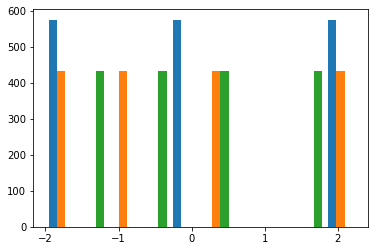

In [44]:
data = data_pcs[:,:3]
#print(data, data_pcs)

plt.hist(data)
plt.show()

### Modèle de classification

In [45]:
# 1. Choix du modèle 
#importer au début de ce notebook 

# 2. Instantiaiton
#model = LogisticRegression(max_iter=10000)
model = DecisionTreeClassifier()
#model = RandomForestClassifier(random_state=1)
# model = KNeighborsClassifier(n_neighbors=5)
# model = SVC()
#model = ensemble.RandomForestClassifier(n_estimators=10)

# 3.  Entrainement du model
model.fit(x_train, y_train)  

ValueError: Unknown label type: 'unknown'

In [ ]:
#graphique
def plot_decision_boundary(xs, model, colors=None, hop=0.01):
    try:
        cmap = ListedColormap(colors.values())
    except AttributeError:
        cmap = None

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, hop), np.arange(y_min, y_max, hop)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx,
        yy,
        zz,
        alpha=0.4,
        cmap=cmap,
        antialiased=True,
    )


def plot_training_points(xs, ys, ft_names=None, target_names=None, colors=None):
    if target_names is None:
        target_names = {}
    if colors is None:
        colors = {}

    for y_val in set(ys):
        plt.scatter(
            xs[ys == y_val, 0],
            xs[ys == y_val, 1],
            color=colors.get(y_val),
            alpha=0.8,
            label=target_names.get(y_val),
            edgecolor="black",
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("3-Class classification")
    try:
        plt.xlabel(ft_names[0])
        plt.ylabel(ft_names[1])
    except TypeError:
        pass

In [ ]:
HOP = 0.01  # Step size in the mesh

COLORS = {0: "green", 1: "red", 2: "blue"}

target_names = {k: v for k, v in enumerate(iris.target_names)}

In [ ]:
plot_decision_boundary(X, model, COLORS, HOP)
plot_training_points(X, Y, features, target_names, COLORS)

### Evaluation

In [ ]:
# 4. predict on x_validation
y_pred = model.predict(x_valid)  

score = metrics.balanced_accuracy_score(y_valid, y_pred)  

print(f"Balanced accuracy score: {score:.3g}")
y_valid.value_counts()

#### Cross validation

In [ ]:
CV = 5
SCORING = "balanced_accuracy"

In [ ]:
scores = model_selection.cross_val_score(model, data_pcs, ys, cv=CV, scoring=SCORINGS)

print(scores)
print(f"\n{SCORINGS}: {scores.mean():.2f}, with std dev: {scores.std():.2f}\n")